In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import regexp_tokenize

In [86]:
#Loading the datasets

df = pd.read_csv('IMDB-Dataset 1.csv')
df2 = pd.read_csv('IMDB-Dataset2.csv')

In [87]:
df2.columns = [''] * len(df.columns) # for removing the existing column names of the dataframe

In [88]:
#Renaming column names of the second dataframe

df2.columns =['review', 'sentiment']
df2.head(3)

,review,sentiment
0,This movie was bad from the start. The only pu...,negative
1,"God, I never felt so insulted in my whole life...",negative
2,Not being a fan of the Coen Brothers or George...,positive


In [89]:
#Merging both the dataframes

df = pd.concat([df,df2])
print("Shape ==> {}".format(df.shape))
df.head(2)

Shape ==> (49999, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive


In [90]:
#Deleting duplicate records

df.drop_duplicates(inplace = True)
print('=== Information of the dataset == \n\n',df.info())
print('\n\n === Shape of the Dataset ==>',df.shape)
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49581 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49581 non-null  object
 1   sentiment  49581 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB
=== Information of the dataset == 

 None


 === Shape of the Dataset ==> (49581, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


**We have now removed all the duplicate records, merged both the dataframe and as we can see we now have 49581 records**

In [91]:
# Lets check the sentiment column once.

df['sentiment'].value_counts()

positive    24884
negative    24697
Name: sentiment, dtype: int64

#### As we see above this dataset has approximately equal number of both the type of sentiments hence their is no imbalance in the dataset.

In [92]:
#We are now tokenizing sentences from comments for futher processing

df['Tokenized sentences'] = df['review'].str.lower().apply(sent_tokenize).apply(','.join)

In [93]:
df.head(3)

,review,sentiment,Tokenized sentences
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,"a wonderful little production.,<br /><br />the..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...


In [94]:
#Performing word tokenization

df['Tokenized Words'] = df['Tokenized sentences'].apply(word_tokenize)
df.head(4)

,review,sentiment,Tokenized sentences,Tokenized Words
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,"a wonderful little production.,<br /><br />the...","[a, wonderful, little, production., ,, <, br, ..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,"[basically, there, 's, a, family, where, a, li..."


In [95]:
#importing stopwords

from nltk.corpus import stopwords 
new_stopwords_list = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin','br','n','t','e','end','see','go','s',
                                                       'to','ca','n','ure','he','z','!','@','#','$','%','^','&','*','(',')'])

In [96]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()

def lem(text):
    return[lemma.lemmatize(w) for w in text if w not in new_stopwords_list]

In [97]:
df['Cleaned Text']= df['Tokenized Words'].apply(lem).apply(','.join)

In [98]:
df.head(3)

,review,sentiment,Tokenized sentences,Tokenized Words,Cleaned Text
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","one,reviewer,mentioned,watching,1,oz,episode,'..."
1,A wonderful little production. <br /><br />The...,positive,"a wonderful little production.,<br /><br />the...","[a, wonderful, little, production., ,, <, br, ...","wonderful,little,production.,,,<,/,>,<,/,>,fil..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","thought,wonderful,way,spend,time,hot,summer,we..."


In [99]:
#For removing all numeric numbers


df['Final'] = df['Cleaned Text'].apply(lambda x: regexp_tokenize(x, "[^0-9]+")).apply(",".join)

df.head(4)

,review,sentiment,Tokenized sentences,Tokenized Words,Cleaned Text,Final
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","one,reviewer,mentioned,watching,1,oz,episode,'...","one,reviewer,mentioned,watching,,,oz,episode,'..."
1,A wonderful little production. <br /><br />The...,positive,"a wonderful little production.,<br /><br />the...","[a, wonderful, little, production., ,, <, br, ...","wonderful,little,production.,,,<,/,>,<,/,>,fil...","wonderful,little,production.,,,<,/,>,<,/,>,fil..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","thought,wonderful,way,spend,time,hot,summer,we...","thought,wonderful,way,spend,time,hot,summer,we..."
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,"[basically, there, 's, a, family, where, a, li...","basically,'s,family,little,boy,jake,think,'s,z...","basically,'s,family,little,boy,jake,think,'s,z..."


In [100]:
# Cleaning the final column again
df['Final'] = df['Final'].apply(lambda x: regexp_tokenize(str(x).lower(), "[^!@#$%&*(),.?<>;:''""\/{}=-_ ]+")).apply(",".join)
df.head(4)

,review,sentiment,Tokenized sentences,Tokenized Words,Cleaned Text,Final
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","one,reviewer,mentioned,watching,1,oz,episode,'...","one,reviewer,mentioned,watching,oz,episode,ll,..."
1,A wonderful little production. <br /><br />The...,positive,"a wonderful little production.,<br /><br />the...","[a, wonderful, little, production., ,, <, br, ...","wonderful,little,production.,,,<,/,>,<,/,>,fil...","wonderful,little,production,filming,technique,..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","thought,wonderful,way,spend,time,hot,summer,we...","thought,wonderful,way,spend,time,hot,summer,we..."
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,"[basically, there, 's, a, family, where, a, li...","basically,'s,family,little,boy,jake,think,'s,z...","basically,s,family,little,boy,jake,think,s,zom..."


In [58]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

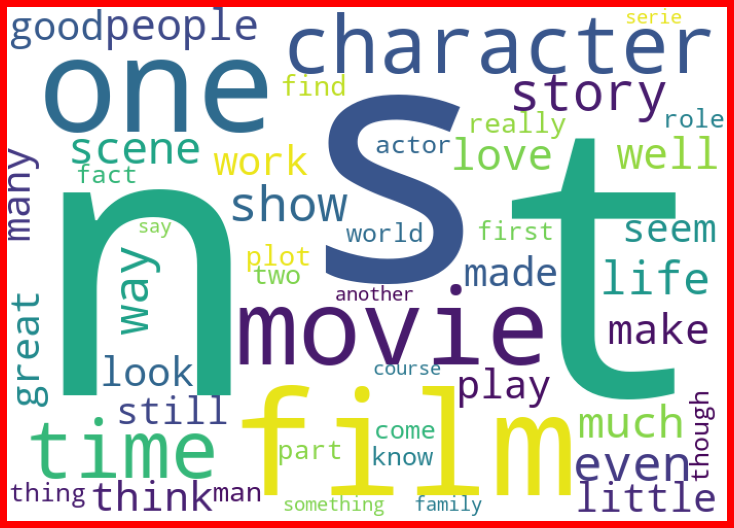

In [101]:
from wordcloud import WordCloud


reviews = df['Final'][df['sentiment']=='positive']

reviews_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(reviews))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(reviews_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

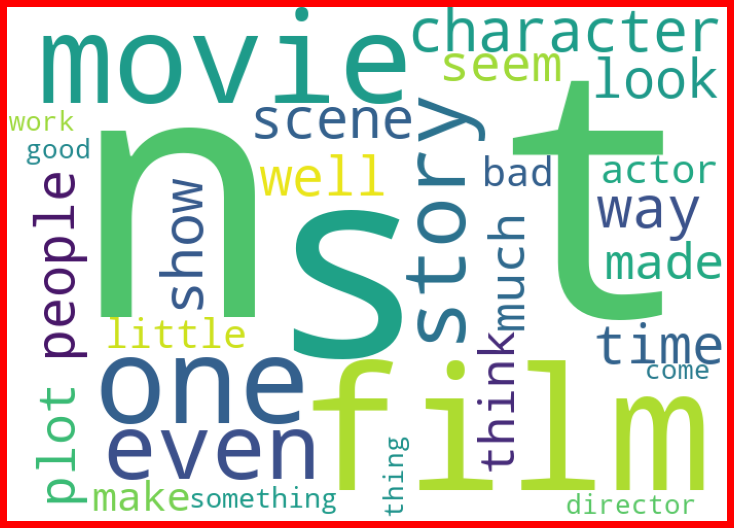

In [102]:
from wordcloud import WordCloud


reviews = df['Final'][df['sentiment']=='negative']

reviews_cloud = WordCloud(width=700,height=500,background_color='white',max_words=30).generate(' '.join(reviews))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(reviews_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(stop_words='english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{2,}',  #vectorize 2-character words or more
    ngram_range=(3, 3))

x = df['Final']
y = df['sentiment']

In [104]:
# Use the content column instead of our single text variable
x = tf.fit_transform(x)
x.shape

(49581, 4702651)

In [106]:
print('The shape of x is {}'.format(x.shape))
print('The shape of y is {}'.format(y.shape))

The shape of x is (49581, 4702651)
The shape of y is (49581,)


In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 100)

**Building Our Model**

In [66]:
#Importing other necessary libraries

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [107]:
mnb = MultinomialNB(fit_prior = True)
train = mnb.fit(x_train,y_train)
test = mnb.predict(x_test)

In [108]:
#Confusion Matrix for Naive Byes
print(confusion_matrix(y_test,test))

[[3669 1276]
 [1147 3825]]


In [109]:
print('---Accuracy Score for Naive Byes---\n\n',accuracy_score(y_test,test))
print('\n---Classification Report for Naive Byes---\n\n',classification_report(y_test,test))

---Accuracy Score for Naive Byes---

 0.7556720782494706

---Classification Report for Naive Byes---

               precision    recall  f1-score   support

    negative       0.76      0.74      0.75      4945
    positive       0.75      0.77      0.76      4972

    accuracy                           0.76      9917
   macro avg       0.76      0.76      0.76      9917
weighted avg       0.76      0.76      0.76      9917



In [110]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
params = {'alpha': list(np.arange(0.1,3,0.1))}
mnb_grid = GridSearchCV(MultinomialNB(fit_prior = True), param_grid= params, cv = 5, n_jobs=-1)

In [111]:
mnb_grid.fit(x_train,y_train)
print('Best Estimators == > \n', mnb_grid.best_params_)

Best Estimators == > 
 {'alpha': 0.6}


In [112]:
mnb_pred =  mnb_grid.predict(x_test)

In [113]:
print(confusion_matrix(y_test,mnb_pred))
print('---Accuracy Score for Naive Byes---\n\n',accuracy_score(y_test,mnb_pred))
print('\n---Classification Report for Naive Byes---\n\n',classification_report(y_test,mnb_pred))

[[3852 1093]
 [1342 3630]]
---Accuracy Score for Naive Byes---

 0.7544620348895835

---Classification Report for Naive Byes---

               precision    recall  f1-score   support

    negative       0.74      0.78      0.76      4945
    positive       0.77      0.73      0.75      4972

    accuracy                           0.75      9917
   macro avg       0.76      0.75      0.75      9917
weighted avg       0.76      0.75      0.75      9917



**Complement Naive Bayes**

In [114]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
train = cnb.fit(x_train,y_train)
test = cnb.predict(x_test)

In [115]:
print(confusion_matrix(y_test,test))
print('---Accuracy Score for Naive Byes---\n\n',accuracy_score(y_test,test))
print('\n---Classification Report for Naive Byes---\n\n',classification_report(y_test,test))

[[4065  880]
 [1626 3346]]
---Accuracy Score for Naive Byes---

 0.7473026116769185

---Classification Report for Naive Byes---

               precision    recall  f1-score   support

    negative       0.71      0.82      0.76      4945
    positive       0.79      0.67      0.73      4972

    accuracy                           0.75      9917
   macro avg       0.75      0.75      0.75      9917
weighted avg       0.75      0.75      0.75      9917



In [116]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
params = {'alpha': list(np.arange(0.1,3,0.1))}
cnb_grid = GridSearchCV(ComplementNB(fit_prior = True), param_grid= params, cv = 5, n_jobs=-1)

In [117]:
cnb_grid.fit(x_train,y_train)
print('Best Estimators == > \n', cnb_grid.best_params_)

Best Estimators == > 
 {'alpha': 0.30000000000000004}


In [118]:
cnb_pred =  cnb_grid.predict(x_test)
print(confusion_matrix(y_test,cnb_pred))
print('---Accuracy Score for Naive Byes---\n\n',accuracy_score(y_test,cnb_pred))
print('\n---Classification Report for Naive Byes---\n\n',classification_report(y_test,cnb_pred))

[[4098  847]
 [1654 3318]]
---Accuracy Score for Naive Byes---

 0.7478067964102046

---Classification Report for Naive Byes---

               precision    recall  f1-score   support

    negative       0.71      0.83      0.77      4945
    positive       0.80      0.67      0.73      4972

    accuracy                           0.75      9917
   macro avg       0.75      0.75      0.75      9917
weighted avg       0.75      0.75      0.75      9917

